In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os
import seaborn as sns
import ev_core

from ev_experiments import (
    run_timeseries_trial,
    ratio_sweep_df,
    phase_sweep_df,
    traces_to_long_df,
    collect_intervention_trials
)

from ev_plotting import (
    plot_ratio_sweep,
    plot_phase_plot,
    plot_spaghetti,
    plot_density,
    plot_fanchart
)


# Baseline scenario dictionary


In [7]:
scenario_base = dict( 
    I0=0.05, # infrastructure level 
    beta_I=2.0, # how strongly infrastructure increases the coordination payoff a_i = a0 + beta_I * I
    b=1.0, # baselnie payoff for D (ICE); used to compute a_i/b
    g_I=0.05, # infrastructure adjustment rate (how quick infrastructure responds to adoption)
    network_type="BA",
    n_nodes=120,
    p_WA=0.1, # edge probability (WS)
    k=4,
    p_ER=0.05, # edge probability (ER)
    m=2, # number of edges to attach for new nodes (BA)
)


# Parameter sweep X0 x ratio


In [4]:
X0_values = np.linspace(0, 1, 21) # Creates 21 evenly spaced initial adoption fractions from 0.0 to 1.0
ratio_values = np.linspace(0.8, 3.5, 41) # Creates 41 values for the payoff ratio a_I / b to sweep across plausible values.

phase_df = phase_sweep_df(
    X0_values = X0_values,
    ratio_values = ratio_values,
    scenario_kwargs = scenario_base,
    batch_size = 3,        # for computational efficiency
    init_noise_I = 0.04,
    T = 100, # for computational efficiency
    strategy_choice_func = "logit",
    tau = 1.0,
    max_workers = 1,
    backend = "thread"
)

filename2=f"plots/parameter_sweep_X0.png"
fig2_path = plot_phase_plot(phase_df, out_path= filename2, fig_title="Parameter sweep X0 x ratio", x_label="Initial adoption level (X0)")
print("Saved phase plot to:", fig2_path)


Saved phase plot to: plots/parameter_sweep_X0.png


# Parameter sweep I0 x ratio

In [8]:
I0_values = np.linspace(0, 1, 21) 
ratio_values = np.linspace(0.8, 3.5, 41) 
phase_df = phase_sweep_df(
    X0_values = I0_values,
    ratio_values = ratio_values,
    scenario_kwargs = scenario_base,
    batch_size = 3,        # for computational efficiency
    init_noise_I = 0.04,
    T = 100, # for computational efficiency
    strategy_choice_func = "logit",
    tau = 1.0,
    max_workers = 1,
    backend = "thread"
)

filename=f"plots/parameter_sweep_I0.png"
fig_path = plot_phase_plot(phase_df, out_path=filename, fig_title = "Parameter sweep I0 x ratio", x_label="Initial infrastructure level (I0)")
print("Saved phase plot to:", fig_path)


Saved phase plot to: plots/parameter_sweep_I0.png


# Parameter sweep βI x ratio 

In [ ]:
beta_I__values = np.linspace(0, 1, 21) 
ratio_values = np.linspace(0.8, 3.5, 41) 
phase_df = phase_sweep_df(
    X0_values = beta_I__values,
    ratio_values = ratio_values,
    scenario_kwargs = scenario_base,
    batch_size = 3,        # for computational efficiency
    init_noise_I = 0.04,
    T = 100, # for computational efficiency
    strategy_choice_func = "logit",
    tau = 1.0,
    max_workers = 1,
    backend = "thread"
)

filename3=f"plots/parameter_sweep_betaI.png"
fig3_path = plot_phase_plot(phase_df, out_path=filename3, fig_title="Parameter sweep βI​ x ratio", x_label="Infrastructure sensitivity of coordination payoff (βI)")
print("Saved phase plot to:", fig3_path)


Saved phase plot to: plots/parameter_sweep_betaI.png


# Ratio sweep (fixed X0)

In [9]:
# this will give us 4 plots, all with different fixed x0 (0.1, 0.2,0.4,0.6). we can use these plots to show tipping behavior at around certain values. 
# these numbers were chosen based on the phase plot - the lower ones show close to none tipping behavior. the more you increase the more tipping occurs.
for X0 in [0.1,0.20,0.40,0.60]:
    print("Running ratio sweep for X0 =", X0)
    sweep_df = ratio_sweep_df(
        X0_frac = X0,
        ratio_values = np.linspace(0.8, 3.5, 41),
        scenario_kwargs = scenario_base,
        batch_size = 5,
        T = 150,
        strategy_choice_func = "logit",
        tau = 1.0
    )
    filename4 = f"plots/ratio_sweep_X0_{X0}.png"
    fig4_path = plot_ratio_sweep(sweep_df, out_path=filename4, fig_title=f"Ratio sweep X0 = {X0}")
    print("Saved ratio sweep:", fig4_path)


Running ratio sweep for X0 = 0.1
Saved ratio sweep: plots/ratio_sweep_X0_0.1.png
Running ratio sweep for X0 = 0.2
Saved ratio sweep: plots/ratio_sweep_X0_0.2.png
Running ratio sweep for X0 = 0.4
Saved ratio sweep: plots/ratio_sweep_X0_0.4.png
Running ratio sweep for X0 = 0.6
Saved ratio sweep: plots/ratio_sweep_X0_0.6.png


# Ratio sweep (fixed I0)

In [10]:
# this will give us 4 plots, all with different fixed x0 (0.1, 0.2,0.4,0.6). we can use these plots to show tipping behavior at around certain values. 
# these numbers were chosen based on the phase plot - the lower ones show close to none tipping behavior. the more you increase the more tipping occurs.
for I0 in [0.1,0.2,0.4,0.6]:
    print("Running for I0", I0)
    sweep_df = ratio_sweep_df(
        X0_frac=I0,
        ratio_values = np.linspace(0.8,3.5,41),
        scenario_kwargs=scenario_base,
        batch_size=3,
        T=100,
        strategy_choice_func="logit",
        tau=1
    )
    filename5=f"plots/ratio_sweep_I0_{I0}.png"
    fig5_path = plot_ratio_sweep(sweep_df,out_path=filename5, fig_title=f"Ratio sweep I0 = {I0}")
    print("Saved ratio sweep:", fig5_path)

Running for I0 0.1
Saved ratio sweep: plots/ratio_sweep_I0_0.1.png
Running for I0 0.2
Saved ratio sweep: plots/ratio_sweep_I0_0.2.png
Running for I0 0.4
Saved ratio sweep: plots/ratio_sweep_I0_0.4.png
Running for I0 0.6
Saved ratio sweep: plots/ratio_sweep_I0_0.6.png


# Ratio sweep (fixed βI)

In [11]:
# this will give us 4 plots, all with different fixed x0 (0.1, 0.2,0.4,0.6). we can use these plots to show tipping behavior at around certain values. 
# these numbers were chosen based on the phase plot - the lower ones show close to none tipping behavior. the more you increase the more tipping occurs.
for beta_i in [0.1,0.2,0.4,0.6]:
    print("Running for beta_i", beta_i)
    sweep_df = ratio_sweep_df(
        X0_frac=beta_i,
        ratio_values = np.linspace(0.8,3.5,41),
        scenario_kwargs=scenario_base,
        batch_size=3,
        T=100,
        strategy_choice_func="logit",
        tau=1
    )
    filename6=f"plots/ratio_sweep_beta_{beta_i}.png"
    fig6_path = plot_ratio_sweep(sweep_df, out_path=filename6, fig_title=f"Ratio sweep βI​ = {beta_i}")
    print("Saved phase plot to:", fig6_path)

Running for beta_i 0.1
Saved phase plot to: plots/ratio_sweep_beta_0.1.png
Running for beta_i 0.2
Saved phase plot to: plots/ratio_sweep_beta_0.2.png
Running for beta_i 0.4
Saved phase plot to: plots/ratio_sweep_beta_0.4.png
Running for beta_i 0.6
Saved phase plot to: plots/ratio_sweep_beta_0.6.png


# Network structure comparison



In [12]:
networks = ["random", "BA","WS"]
for net in networks:
    print("Network:", net)
    scen = {**scenario_base, "network_type": net}
    phase_df_net = phase_sweep_df(
        X0_values = np.linspace(0.0, 1.0, 21),
        ratio_values = np.linspace(0.8, 3.5, 41),
        scenario_kwargs = scen,
        batch_size = 3,
        T = 100,
        strategy_choice_func = "logit",
        tau = 1.0,
        max_workers = 1,
        backend = "thread"
    )
    filename8=f"plots/phase_sweep_{net}.png"
    fig8_path = plot_phase_plot(phase_df_net, out_path=filename8, fig_title=f"Phase sweep: {net} network", x_label="Initial adoption level (X0)")
    shutil.move(fig8_path, filename8)
    print("Saved phase plot for", net, "to", filename8)



Network: random


KeyboardInterrupt: 

# Speed of adoption 

        time_to_target                                             
                 count      mean       std  min  25%  50%  75%  max
network                                                            
BA                49.0  0.061224  0.242226  0.0  0.0  0.0  0.0  1.0
WA                50.0  0.560000  0.501427  0.0  0.0  1.0  1.0  1.0
random            46.0  0.586957  0.497821  0.0  0.0  1.0  1.0  1.0


C:\Users\ecate\AppData\Local\Temp\ipykernel_14032\2026667893.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


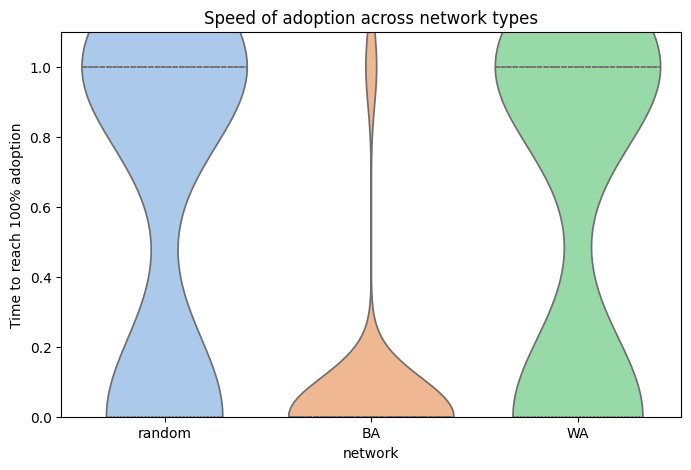

In [ ]:
networks = ["random", "BA", "WS"]
target_adoption = 1  
speed_data = []

for net in networks:
    scenario_net = {
        **scenario_base,
        "network_type": net,
        "X0_frac": 0.8,
        "ratio": 3.0  
    }

    baseline_X, _, _, _, _, _ = collect_intervention_trials(
        n_trials=50,
        T=100,
        scenario_kwargs=scenario_net,
        subsidy_params=None
    )

    for trial in baseline_X:
        times = np.argmax(trial >= target_adoption)
        if trial[-1] < target_adoption:
            times = np.nan  
        speed_data.append({"network": net, "time_to_target": times})

# Convert to DataFrame for easy plotting
speed_df = pd.DataFrame(speed_data)

# Summary statistics
print(speed_df.groupby("network").describe())
plot_df = speed_df.dropna(subset=["time_to_target"])

# Violin plot
plt.figure(figsize=(8,5))
sns.violinplot(
    x="network",
    y="time_to_target",
    data=plot_df,
    inner="quartile",
    palette="pastel"
)
plt.ylabel(f"Time to reach {target_adoption*100:.0f}% adoption")
plt.title("Speed of adoption across network types")
plt.ylim(0, plot_df["time_to_target"].max() + 0.1)  # nice padding above max
plt.show()

# Probability of reaching high-adoption equilibrium


In [ ]:
for net in ["random", "BA","WS"]:
    scenario_net = {
        **scenario_base,
        "network_type": net,
        "X0_frac": 0.6,  
        "ratio": 1.5   
    }

    baseline_X, _, _, _, _, _ = collect_intervention_trials(
        n_trials=100,
        T=100,
        scenario_kwargs=scenario_net,
        subsidy_params=None
    )

    final_X = np.array([x[-1] for x in baseline_X])
    prob_high = np.mean(final_X > 0.8)

    print(net, "probability of high adoption:", prob_high)

random probability of high adoption: 0.84
BA probability of high adoption: 0.57
WA probability of high adoption: 1.0


# Policy intervention: A0 = 0.6

In [ ]:
NETWORKS = ["random", "BA", "WS"]

X0 = 0.4
ratio = 1.5
T = 100
n_trials = 100
seed_base = 42

subsidy_params = {
    "start": 5,
    "end": 50,
    "delta_a0": 0.6,
    "delta_beta_I": 0.0
}

def prob_high_adoption(X_list, threshold=0.8):
    finals = np.array([x[-1] for x in X_list])
    return float(np.mean(finals > threshold)), finals

rows = []

for net in NETWORKS:
    scenario_kwargs = {
        **scenario_base,
        "network_type": net,   
        "X0_frac": X0,
        "ratio": ratio
    }

    print("Running network_type =", scenario_kwargs["network_type"])

    baseline_X, baseline_I, subsidy_X, subsidy_I, baseline_df, subsidy_df = collect_intervention_trials(
        n_trials=n_trials,
        T=T,
        scenario_kwargs=scenario_kwargs,
        subsidy_params=subsidy_params,
        max_workers=1,
        seed_base=seed_base,
        strategy_choice_func="imitate",
        tau=1.0
    )

    # KPI: probability of reaching high-adoption equilibrium
    p_base, finals_base = prob_high_adoption(baseline_X, threshold=0.8)
    p_sub,  finals_sub  = prob_high_adoption(subsidy_X,  threshold=0.8)

    rows.append({
        "network": net,
        "baseline_prob_high": p_base,
        "subsidy_prob_high": p_sub,
        "baseline_final_mean": float(finals_base.mean()),
        "subsidy_final_mean": float(finals_sub.mean())
    })

    traces_df = traces_to_long_df(baseline_X, subsidy_X)

    plot_fanchart(
        traces_df,
        out_path=f"plots/fanchart0.6_{net}.png",
        fig_title=f"{net}: fanchart baseline vs subsidy (a0 = 0.6)"
    )

kpi_df = pd.DataFrame(rows).sort_values("network")
print(kpi_df)


Running network_type = random
Running network_type = BA


# Policy intervention: A0 = 0.8

In [15]:

NETWORKS = ["random", "BA", "WS"]

X0 = 0.6
ratio = 1.5
T = 100
n_trials = 100
seed_base = 42

subsidy_params = {
    "start": 5,
    "end": 50,
    "delta_a0": 0.8,
    "delta_beta_I": 0.0
}

def prob_high_adoption(X_list, threshold=0.8):
    finals = np.array([x[-1] for x in X_list])
    return float(np.mean(finals > threshold)), finals

rows = []

for net in NETWORKS:
    scenario_kwargs = {
        **scenario_base,
        "network_type": net,   
        "X0_frac": X0,
        "ratio": ratio
    }

    print("Running network_type =", scenario_kwargs["network_type"])

    baseline_X, baseline_I, subsidy_X, subsidy_I, baseline_df, subsidy_df = collect_intervention_trials(
        n_trials=n_trials,
        T=T,
        scenario_kwargs=scenario_kwargs,
        subsidy_params=subsidy_params,
        max_workers=1,
        seed_base=seed_base,
        strategy_choice_func="imitate",
        tau=1.0
    )

    # KPI: probability of reaching high-adoption equilibrium
    p_base, finals_base = prob_high_adoption(baseline_X, threshold=0.8)
    p_sub,  finals_sub  = prob_high_adoption(subsidy_X,  threshold=0.8)

    rows.append({
        "network": net,
        "baseline_prob_high": p_base,
        "subsidy_prob_high": p_sub,
        "baseline_final_mean": float(finals_base.mean()),
        "subsidy_final_mean": float(finals_sub.mean())
    })

    traces_df = traces_to_long_df(baseline_X, subsidy_X)


    plot_fanchart(
        traces_df,
        out_path=f"plots/fanchart0.8_{net}.png",
        fig_title=f"{net}: fanchart baseline vs subsidy (a0 = 0.8)"
    )

kpi_df = pd.DataFrame(rows).sort_values("network")
print(kpi_df)


Running network_type = random
Running network_type = BA
Running network_type = WS
  network  baseline_prob_high  subsidy_prob_high  baseline_final_mean  \
1      BA                0.57               0.58             0.577583   
2      WS                1.00               1.00             1.000000   
0  random                0.84               0.89             0.856500   

   subsidy_final_mean  
1            0.588250  
2            1.000000  
0            0.895917  


# Policy intervention: A0 = 0.3

In [16]:

NETWORKS = ["random", "BA", "WS"]

X0 = 0.6
ratio = 1.5
T = 100
n_trials = 100
seed_base = 42

subsidy_params = {
    "start": 5,
    "end": 50,
    "delta_a0": 0.3,
    "delta_beta_I": 0.0
}

def prob_high_adoption(X_list, threshold=0.8):
    finals = np.array([x[-1] for x in X_list])
    return float(np.mean(finals > threshold)), finals

rows = []

for net in NETWORKS:
    scenario_kwargs = {
        **scenario_base,
        "network_type": net,   
        "X0_frac": X0,
        "ratio": ratio
    }

    print("Running network_type =", scenario_kwargs["network_type"])

    baseline_X, baseline_I, subsidy_X, subsidy_I, baseline_df, subsidy_df = collect_intervention_trials(
        n_trials=n_trials,
        T=T,
        scenario_kwargs=scenario_kwargs,
        subsidy_params=subsidy_params,
        max_workers=1,
        seed_base=seed_base,
        strategy_choice_func="imitate",
        tau=1.0
    )

    # KPI: probability of reaching high-adoption equilibrium
    p_base, finals_base = prob_high_adoption(baseline_X, threshold=0.8)
    p_sub,  finals_sub  = prob_high_adoption(subsidy_X,  threshold=0.8)

    rows.append({
        "network": net,
        "baseline_prob_high": p_base,
        "subsidy_prob_high": p_sub,
        "baseline_final_mean": float(finals_base.mean()),
        "subsidy_final_mean": float(finals_sub.mean())
    })

    traces_df = traces_to_long_df(baseline_X, subsidy_X)


    plot_fanchart(
        traces_df,
        out_path=f"plots/fanchart0.3_{net}.png",
        fig_title=f"{net}: fanchart baseline vs subsidy (a0 = 0.3)"
    )

kpi_df = pd.DataFrame(rows).sort_values("network")
print(kpi_df)


Running network_type = random


KeyboardInterrupt: 